# Tarea 5
#### Alberto Benavides

## Definición de la tarea

Un jugador tiene un capital inicial de $m$ pesos. Siempre apuesta rojos. Cuando gana recibe $1$ peso, pierde $1$ peso en caso contrario.
1. ¿Cuántas veces $n_0$ debe jugar la ruleta para tener una probabilidad del $70\%$ de tener una diferencia en su capital igual a $g$?
2. ¿Cuál es la probabilidad de contar con capital positivo al final de los $n_0$ juegos?
3. ¿Cuál es su probabilidad de quedar en la ruina?

## Respuestas

El juego de ruleta consta de 38 casillas: $[00, 0, 1, 2, 3, \ldots, 36]$. Las casillas $00$ y $0$ son verdes. El resto son mitad rojas y mitad negras. La probabilidad de ganar es $p = 18 / 38 = 9 / 19$ y la de perder $q = 20 / 38 = 10 / 19$. Si un jugador elige siempre un color antes de girar la ruleta, el valor esperado $E$ de su elección está dado por
$$E(X) = -1 ( 20/38) + 1 (18/38)$$
$$E(X) = -\frac{1}{19} \approx -0.0526.$$

La probabiliad de terminar el juego con $g$ pesos está definidida por [Kozek](https://www.sciencedirect.com/science/article/pii/S0304414902001060) y viene dada por
$$P(g) = 1 - \frac{(q / p)^g - (q / p)^m}{(q/p)^g - 1},$$
para este caso
$$P(g) = 1 - \frac{(10/ 9)^g - (10 / 9)^m}{(10/9)^g - 1}.$$

La probabilidad de quedar en la ruina es $1 - P(g)$.

## Aproximación computacional

In [4]:
from random import randint
import matplotlib.pyplot as plt

g = 12
Perdidos: 289
Ganados: 711
Media de giros: 31.931


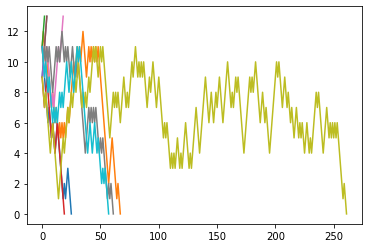

g = 13
Perdidos: 357
Ganados: 643
Media de giros: 42.128


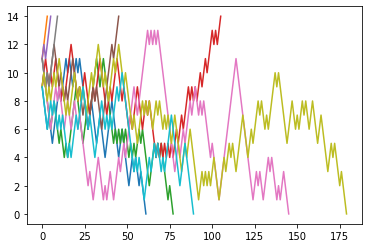

g = 14
Perdidos: 402
Ganados: 598
Media de giros: 51.318


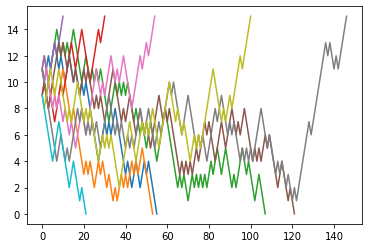

g = 15
Perdidos: 450
Ganados: 550
Media de giros: 61.864


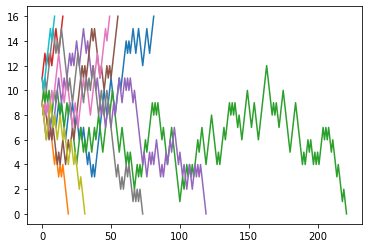

g = 16
Perdidos: 516
Ganados: 484
Media de giros: 71.514


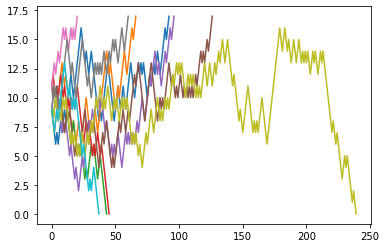

g = 17
Perdidos: 561
Ganados: 439
Media de giros: 75.626


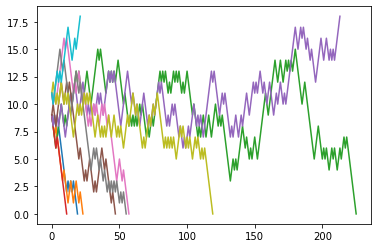

g = 18
Perdidos: 567
Ganados: 433
Media de giros: 88.869


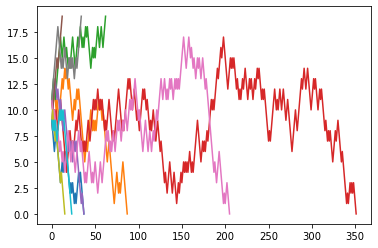

g = 19
Perdidos: 645
Ganados: 355
Media de giros: 93.594


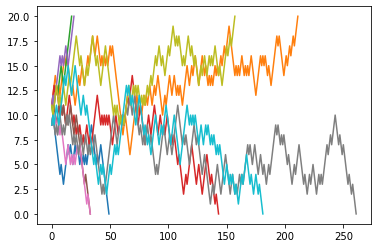

g = 20
Perdidos: 686
Ganados: 314
Media de giros: 105.362


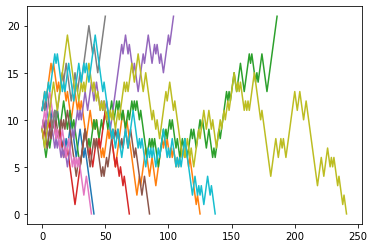

In [38]:

total_ganados = []
total_juegos = []
for j in [12, 13, 14, 15, 16, 17, 18, 19, 20]:
    g = j

    perdidos = 0
    juegos = []

    plt.figure()
    for i in range(1000):
        m = 10
        n = 0
        resultados = [] 

        while m > 0 and m <= g:
            if randint(0, 38) < 20:
                m -= 1
            else:
                m += 1
            resultados.append(m)
            n += 1
        if (i < 10):
            plt.plot(range(n), resultados)
        if m <= 0:
            perdidos += 1
        juegos.append(len(resultados))

    print('g = {}'.format(j))
    print('Perdidos: {}'.format(perdidos))
    print('Ganados: {}'.format(1000 - perdidos))
    from statistics import mean
    print('Media de giros: {}'.format(mean(juegos)))
    plt.show()
    total_ganados.append((1000 - perdidos) / 1000)
    total_juegos.append(mean(juegos))

La probabilidad de victorias dado $g$ está ejemplificada por la siguiente gráfica.

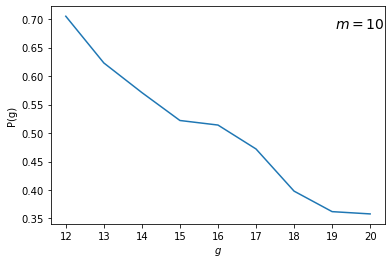

In [35]:
plt.figure()
plt.plot([12, 13, 14, 15, 16, 17, 18, 19, 20], total_ganados)
plt.xlabel('$g$')
plt.ylabel('P(g)')
plt.annotate("$m = 10$", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
plt.show()

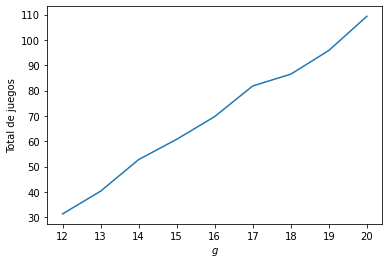

In [26]:
plt.figure()
plt.plot([12, 13, 14, 15, 16, 17, 18, 19, 20], total_juegos)
plt.xlabel('$g$')
plt.ylabel('Total de juegos')
plt.show()